# IMPORT CSV FILE:-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Telco-Customer-churn.csv')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# CLEAN DATA:-

# Checking data info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [8]:
data["TotalCharges"] = data["TotalCharges"].replace(" ","0")
data["TotalCharges"] = data["TotalCharges"].astype("float")

# Checking data info after making some changes

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Checking for null values

In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Describe our data

In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Checking for duplicate data

In [19]:
data.duplicated().sum()

0

In [21]:
data["customerID"].duplicated().sum()

0

# Convert the values of SeniorCitizen from (0,1) to (no,yes)

In [23]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

data["SeniorCitizen"] = data["SeniorCitizen"].apply(conv)

# After convert the values of SeniorCitizen from (0,1) to (no,yes) checking the data

In [25]:
data.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# PERFORM ANALYSIS:-

# Checking for the number of customer who had churned

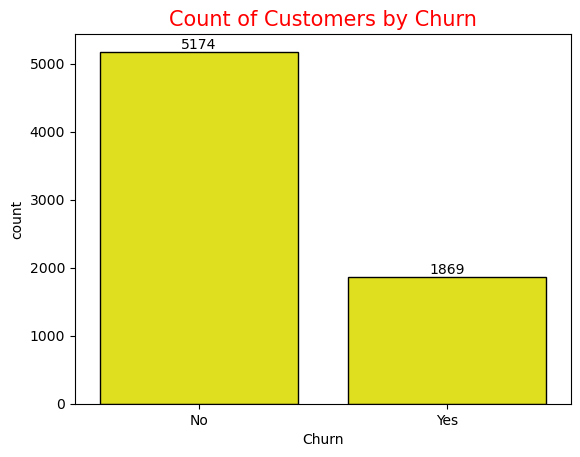

In [121]:
ax = sns.countplot(x = 'Churn', data = data,color = "yellow",edgecolor = "black")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn", fontsize = 15, color = 'red')
plt.show()

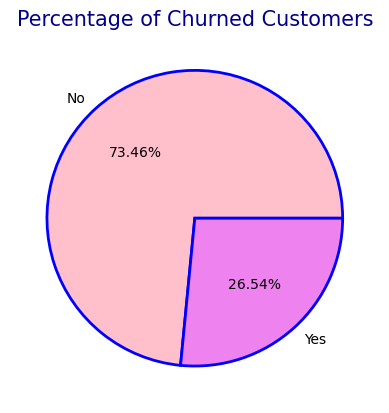

In [122]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%",colors = ["pink", "violet"], wedgeprops = {'edgecolor':'blue','linewidth':2})
plt.title("Percentage of Churned Customers",fontsize = 15, color = 'darkblue',) 
plt.show()

# Checking for the number of churned customers on the basis of gender

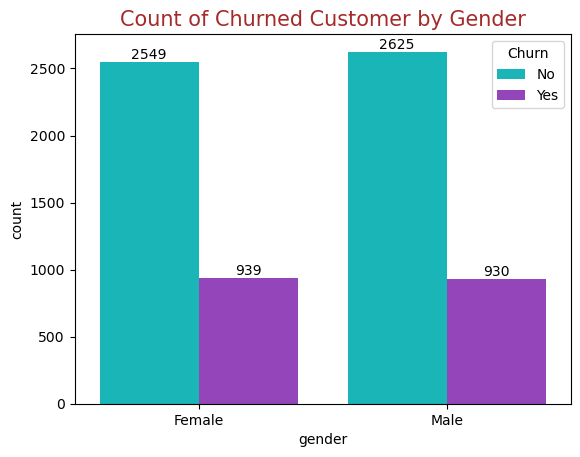

In [126]:
colors =  {'Yes': 'darkorchid', 'No': 'darkturquoise'}
ax = sns.countplot(x = 'gender', data = data, hue = 'Churn', palette = colors)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Churned Customer by Gender", color = 'brown', fontsize = 15)
plt.show()

# Percentage of customers on the basis of senior citizens

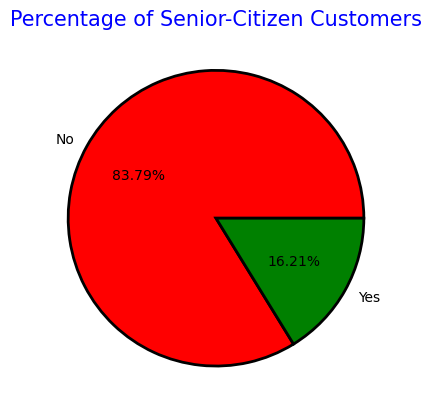

In [124]:
gb = df.groupby("SeniorCitizen").agg({'SeniorCitizen':"count"})
plt.pie(gb['SeniorCitizen'], labels = ['No', 'Yes'], autopct = "%1.2f%%",colors = ["red", "green"], wedgeprops = {'edgecolor':'black','linewidth':2})
plt.title("Percentage of Senior-Citizen Customers",fontsize = 15, color = 'blue',) 
plt.show()

# Checking for the number of churned customers on the basis of seniorcitizens

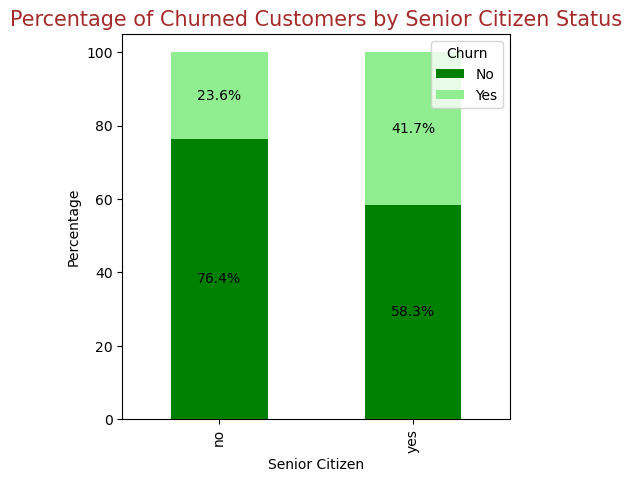

In [77]:
# Calculate percentage values
data_grouped = data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Create figure and axis
fig, ax = plt.subplots(figsize=(5,5))

# Plot the data with stacking
data_grouped.plot(kind='bar', stacked=True, ax=ax, color=['green', 'lightgreen'])

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Customize the plot
plt.title("Percentage of Churned Customers by Senior Citizen Status", color='brown', fontsize=15)
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn", loc = 'upper right')

# Show the plot
plt.show()

# Checking for number of churned customers on the basis of tenure

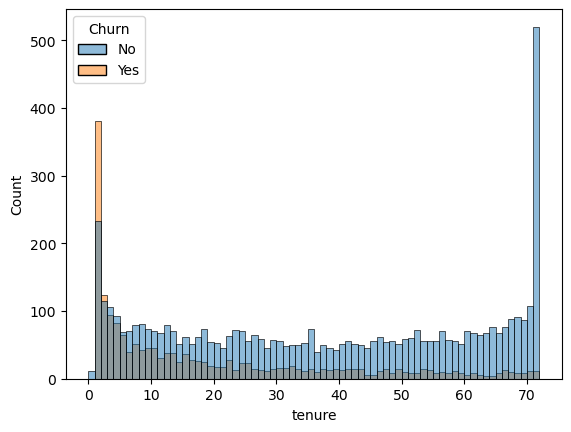

In [78]:
plt.figure(figure = (9,4))
sns.histplot(x = "tenure", data = data, bins = 72, hue = "Churn",)
plt.show()

# Percentage of customers on the basis of different contracts

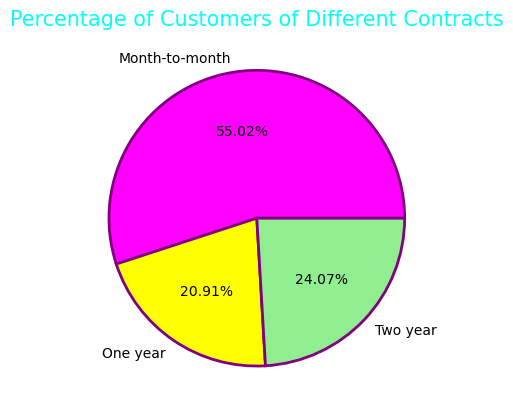

In [125]:
gb = df.groupby("Contract").agg({'Contract':"count"})
plt.pie(gb['Contract'], labels = gb.index, autopct = "%1.2f%%",colors = ["magenta","yellow", "lightgreen"], wedgeprops = {'edgecolor':'purple','linewidth':2})
plt.title("Percentage of Customers of Different Contracts",fontsize = 15, color = 'aqua',) 
plt.show()

# Checking for the number of churned customers on the basis of different contracts

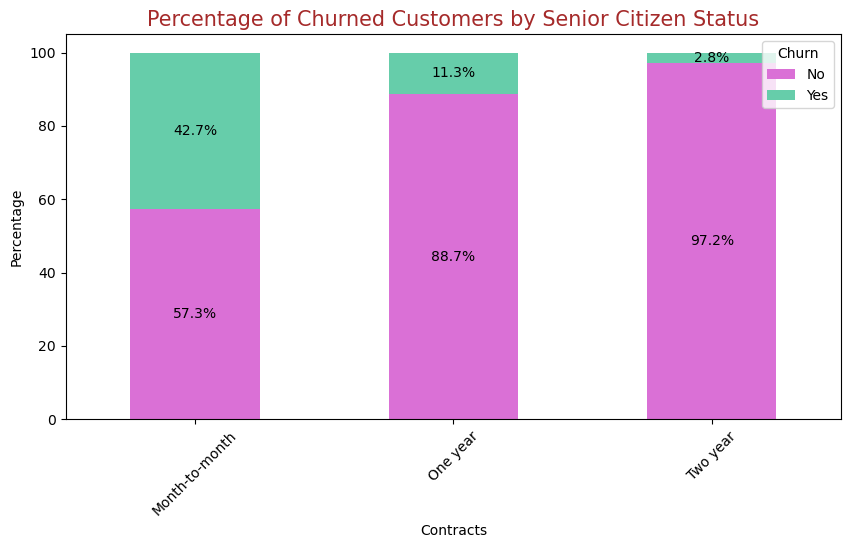

In [110]:
# Calculate percentage values
data_grouped = data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

# Create figure and axis
fig, ax = plt.subplots(figsize=(10,5))

# Plot the data with stacking
data_grouped.plot(kind='bar', stacked=True, ax=ax, color=['orchid','mediumaquamarine'])

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Customize the plot
plt.title("Percentage of Churned Customers by Senior Citizen Status", color='brown', fontsize=15)
plt.ylabel("Percentage")
plt.xlabel("Contracts")
plt.legend(title="Churn", loc = 'upper right')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

# Display all the columns

In [96]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Counting the number of churned customers on the basis of PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

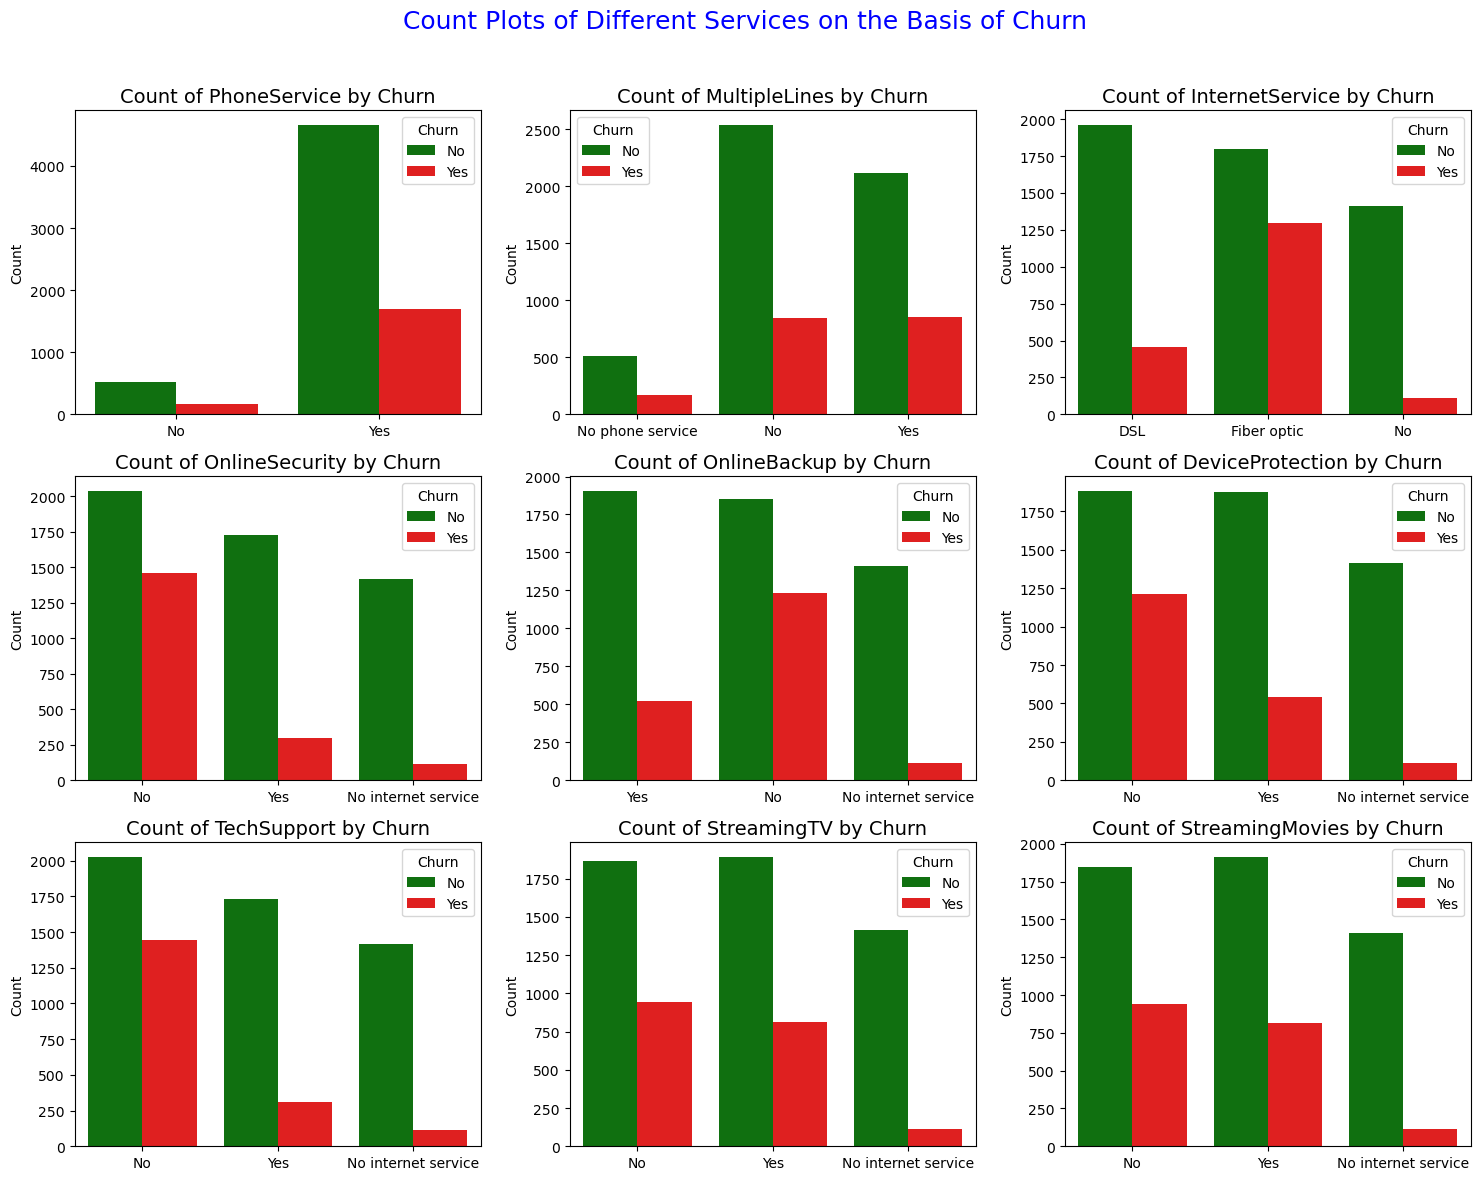

In [103]:
# Define the columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Count Plots of Different Services on the Basis of Churn", fontsize=18, color='blue')

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Define custom colors for Churn categories
churn_colors = {'Yes': 'red', 'No': 'green'}  # You can change these colors

# Loop through each column and create a count plot with Churn hue
for i, col in enumerate(columns):
    sns.countplot(x=data[col], hue=data['Churn'], ax=axes[i], palette=churn_colors)
    axes[i].set_title(f"Count of {col} by Churn", fontsize=14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Checking for the number of churned customers on the basis of payment method

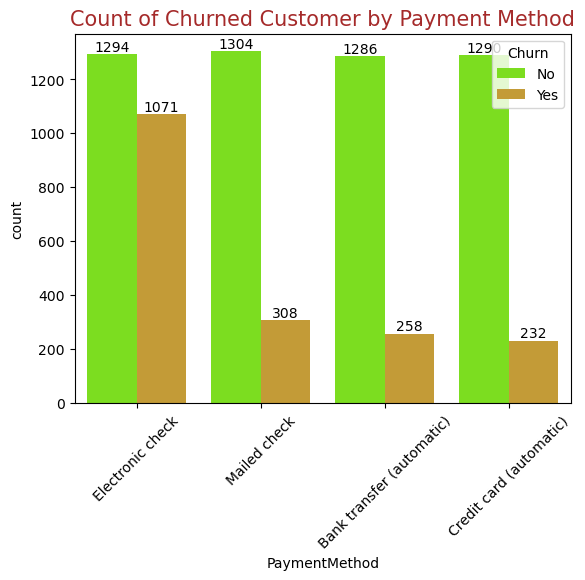

In [130]:
colors =  {'Yes': 'goldenrod', 'No': 'lawngreen'}
ax = sns.countplot(x = 'PaymentMethod', data = data, hue = 'Churn', palette = colors)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Churned Customer by Payment Method", color = 'brown', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()